In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error , r2_score
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from windrose import WindroseAxes

In [29]:
df=pd.read_csv(r'C:\Users\91948\CondaIBM\Final Project\Data Colletion\Wind turbine.csv')

In [30]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [31]:
df.tail()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913
50529,31 12 2018 23:50,2820.466064,9.979332,2779.184096,82.274620


In [32]:
df.shape

(50530, 5)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [34]:
df.dtypes

Date/Time                         object
LV ActivePower (kW)              float64
Wind Speed (m/s)                 float64
Theoretical_Power_Curve (KWh)    float64
Wind Direction (°)               float64
dtype: object

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LV ActivePower (kW),50530.0,1307.684332,1312.459242,-2.471405,50.677890,825.838074,2482.507568,3618.732910
Wind Speed (m/s),50530.0,7.557952,4.227166,0.000000,4.201395,7.104594,10.300020,25.206011
Theoretical_Power_Curve (KWh),50530.0,1492.175463,1368.018238,0.000000,161.328167,1063.776283,2964.972462,3600.000000
Wind Direction (°),50530.0,123.687559,93.443736,0.000000,49.315437,73.712978,201.696720,359.997589


In [36]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
50525    False
50526    False
50527    False
50528    False
50529    False
Length: 50530, dtype: bool

In [37]:
df.isna().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [38]:
df.isnull().any

<bound method NDFrame._add_numeric_operations.<locals>.any of        Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0          False                False             False   
1          False                False             False   
2          False                False             False   
3          False                False             False   
4          False                False             False   
...          ...                  ...               ...   
50525      False                False             False   
50526      False                False             False   
50527      False                False             False   
50528      False                False             False   
50529      False                False             False   

       Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                              False               False  
1                              False               False  
2                              False               F

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [40]:
df.corr()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
LV ActivePower (kW),1.000000,0.912774,0.949918,-0.062702
Wind Speed (m/s),0.912774,1.000000,0.944209,-0.077188
Theoretical_Power_Curve (KWh),0.949918,0.944209,1.000000,-0.099076
Wind Direction (°),-0.062702,-0.077188,-0.099076,1.000000


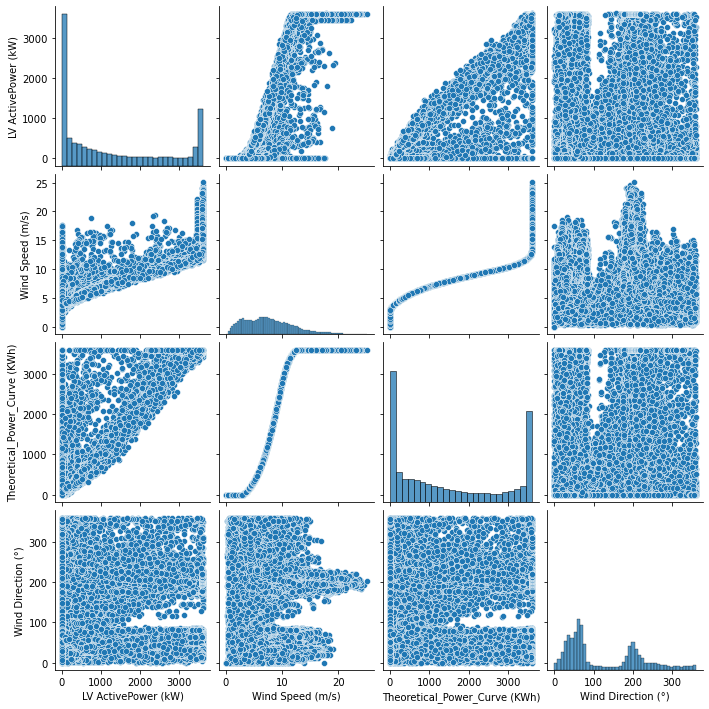

In [41]:
#data description and visualization
sns.pairplot(df)

<AxesSubplot:xlabel='Wind Speed (m/s)'>

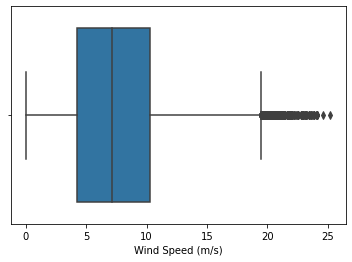

In [43]:
sns.boxplot(df['Wind Speed (m/s)'])

In [16]:
df.corr()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
LV ActivePower (kW),1.000000,0.912774,0.949918,-0.062702
Wind Speed (m/s),0.912774,1.000000,0.944209,-0.077188
Theoretical_Power_Curve (KWh),0.949918,0.944209,1.000000,-0.099076
Wind Direction (°),-0.062702,-0.077188,-0.099076,1.000000


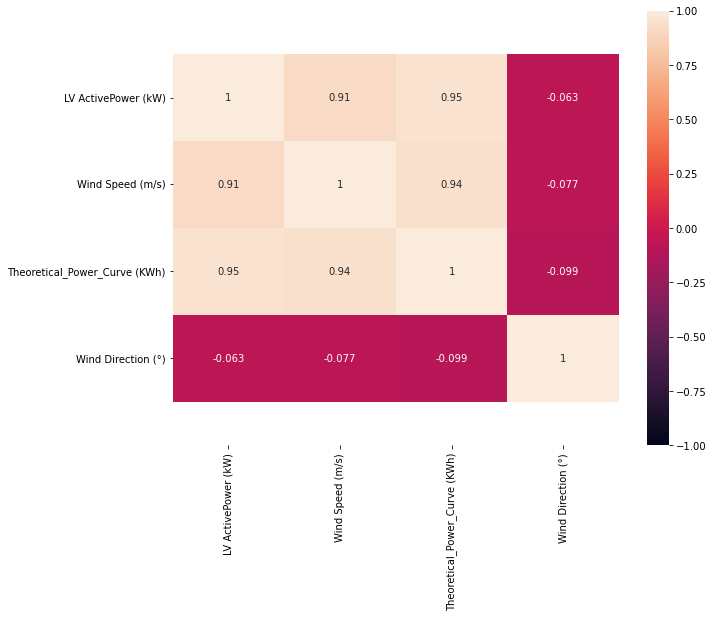

                               LV ActivePower (kW)  Wind Speed (m/s)  \
LV ActivePower (kW)                       1.000000          0.912774   
Wind Speed (m/s)                          0.912774          1.000000   
Theoretical_Power_Curve (KWh)             0.949918          0.944209   
Wind Direction (°)                       -0.062702         -0.077188   

                               Theoretical_Power_Curve (KWh)  \
LV ActivePower (kW)                                 0.949918   
Wind Speed (m/s)                                    0.944209   
Theoretical_Power_Curve (KWh)                       1.000000   
Wind Direction (°)                                 -0.099076   

                               Wind Direction (°)  
LV ActivePower (kW)                     -0.062702  
Wind Speed (m/s)                        -0.077188  
Theoretical_Power_Curve (KWh)           -0.099076  
Wind Direction (°)                       1.000000  


In [17]:
plt.figure(figsize=(10,8))
corr=df.corr()
ax=sns.heatmap(corr,vmin=-1,vmax=1,annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom +0.5,top -0.5)
plt.show()
print(corr)

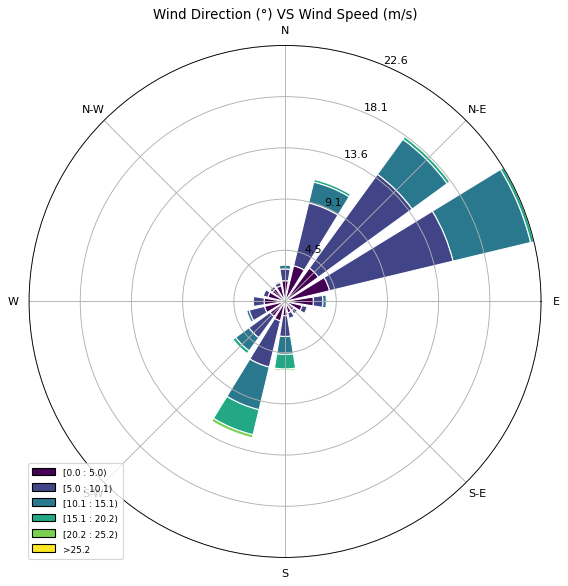

In [18]:
ax = WindroseAxes.from_ax()
ax.bar(df['Wind Direction (°)'], df['Wind Speed (m/s)'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Direction (°) VS Wind Speed (m/s)")
plt.show()

In [19]:
df["Date/Time"] = pd.to_datetime(df["Date/Time"], format = "%d %m %Y %H:%M", errors = "coerce")
df['year'] = df['Date/Time'].dt.year 
df['month'] = df['Date/Time'].dt.month 
df['day'] = df['Date/Time'].dt.day
df['Hour'] = df['Date/Time'].dt.hour 
df['minute'] = df['Date/Time'].dt.minute 

In [20]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),year,month,day,Hour,minute
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40


In [21]:
df.tail()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),year,month,day,Hour,minute
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,2018,12,31,23,10
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,2018,12,31,23,20
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,2018,12,31,23,30
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,2018,12,31,23,40
50529,2018-12-31 23:50:00,2820.466064,9.979332,2779.184096,82.274620,2018,12,31,23,50


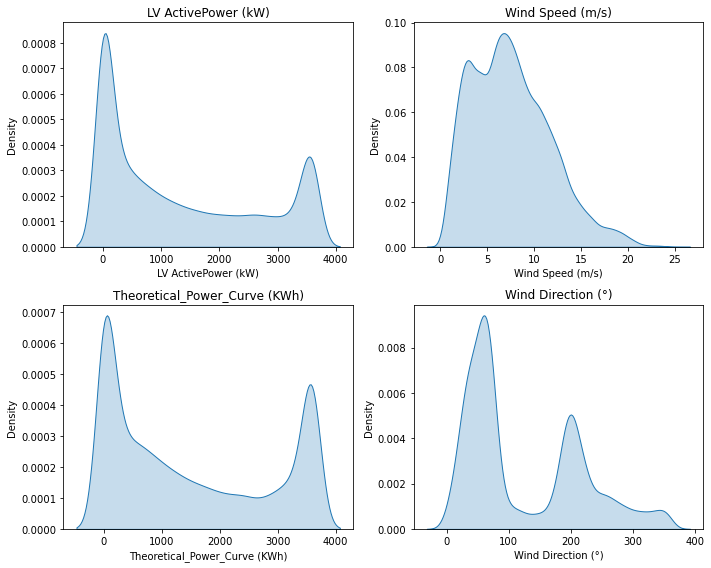

In [22]:
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(df.iloc[:,i+1], shade=True)
    plt.title(df.columns[i+1])
plt.tight_layout()
plt.show()

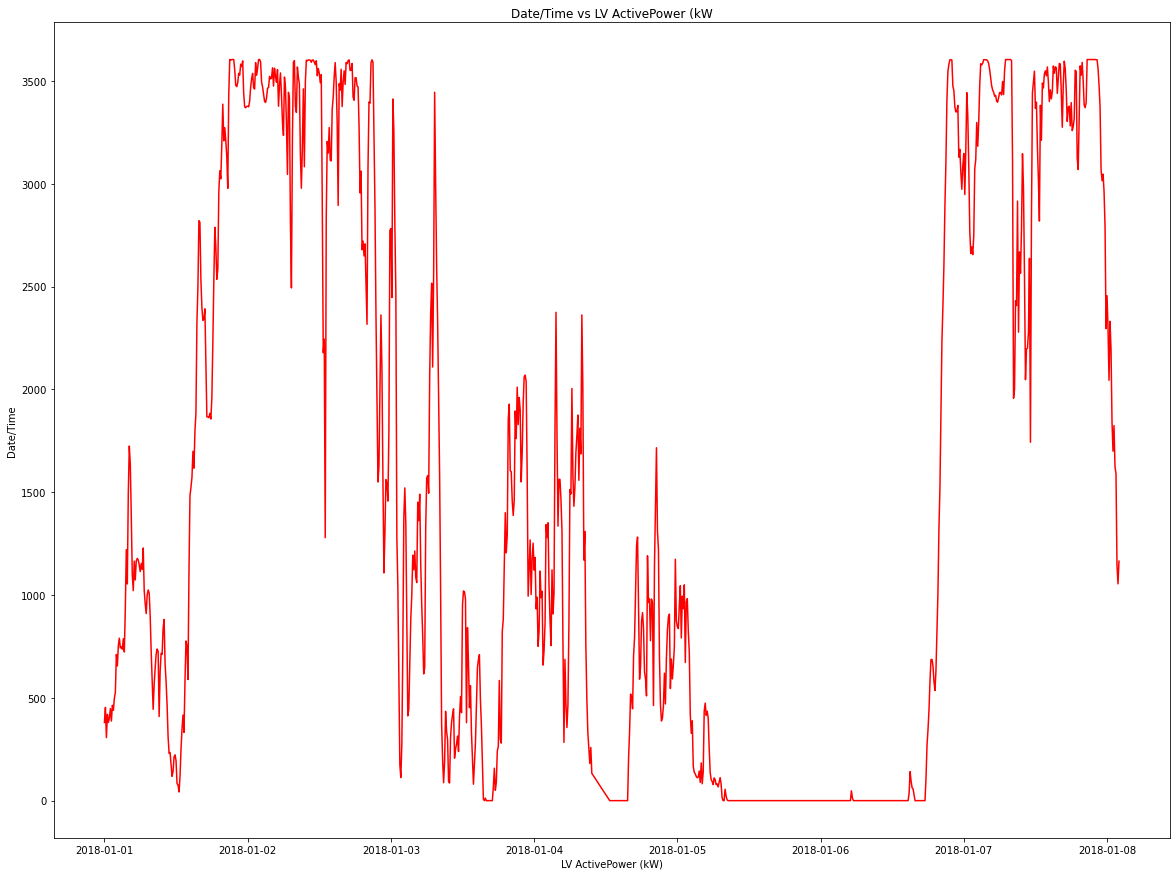

In [24]:
fig, ax = plt.subplots(figsize=(20,15))
ax.plot(df['Date/Time'][0:1000],
        df['LV ActivePower (kW)'][0:1000],
        color='red')
ax.set(xlabel="LV ActivePower (kW)",
       ylabel="Date/Time",
       title="Date/Time vs LV ActivePower (kW")
plt.show()